# Exploratory Data Analysis for Car Insurance Fraud

The following report will use an open-source dataset uploaded by Oracle. This data sets includes  more then 15000 data samples about insurance claims, they include really important variables that could be correlated with the target variable of fraudulent or non-fraudulent claims.

In [8]:
# import all dependencies and data
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import seaborn as sns
import calendar

%matplotlib notebook
sns.set_style("white")

#sns.set(style="whitegrid", color_codes = True)

import utils

data_org = pd.read_csv('claims.csv')
data = data_org

<IPython.core.display.Javascript object>


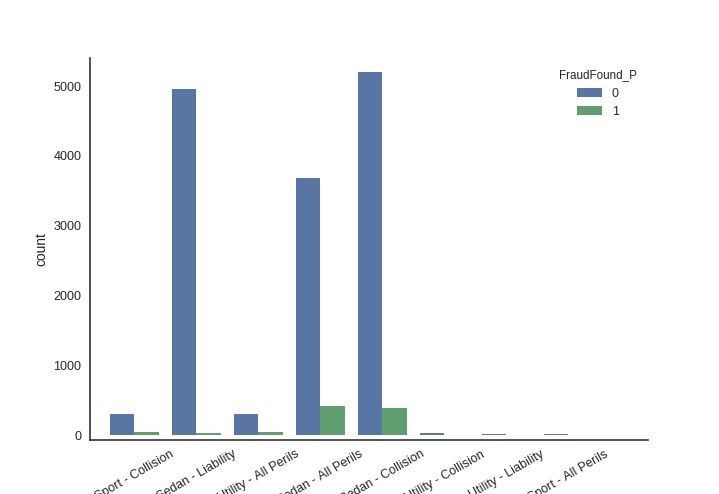

In [9]:
g = sns.countplot(x = "PolicyType", hue = "FraudFound_P", data = data)
for item in g.get_xticklabels():
    item.set_rotation(30)
sns.despine()
#plt.show()

Types and names of the fields

Set datetimeVariables to do some plots about the fraudulent claims

In [10]:
data = utils.transform_the_date(data)

#Getting rid of nans
data = data.dropna()

In [4]:
data["date"] = data.apply(utils.convert_to_date, axis = 1)
data["dateClaimed"] = data.apply(utils.convert_to_date_claim, axis = 1)
data["date"] = pd.to_datetime(data["date"], errors = "coerce")
data["dateClaimed"] = pd.to_datetime(data["dateClaimed"], errors = "coerce")

/home/jose/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/jose/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/jose/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati

In [5]:
# Cleaning 0 values in Age column
# Missing Values = 319
data[data["Age"] == 0].count()[0]
# Changing Missing Values to Nan
data["Age"].replace(0, np.NaN, inplace = True)
data["Age"].fillna(data["Age"].mean(), inplace = True)

delay = ((data["dateClaimed"] - data["date"]) / np.timedelta64(1, 'D')).astype(int)
data["delay"] = delay

/home/jose/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:3924: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/home/jose/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:3660: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/home/jose/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if 

In [6]:
condition = data["FraudFound_P"] == 1
a = np.where(condition, 'Fraud', "Not Fraud")
count = data.groupby(a)["FraudFound_P"].count()

frauds = data[data["FraudFound_P"] == 1]
not_frauds = data[data["FraudFound_P"] == 0]

print("Number of Frauds: " +  str(count["Fraud"]))
print("Number of Frauds: " +  str(count["Not Fraud"]))
print("Percentage: " +  str(count["Fraud"]/count["Not Fraud"]*100))

Number of Frauds: 923
Number of Frauds: 14496
Percentage: 6.36727373068


## Date of accident vs. Percentage of frauds

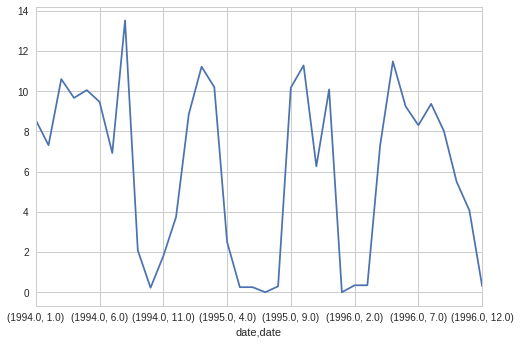

In [7]:
# TODO: Plot Ticks

A = data.groupby([frauds["date"].dt.year, frauds["date"].dt.month])["date"].count()
B = data.groupby([not_frauds["date"].dt.year, not_frauds["date"].dt.month])["date"].count()
(A/B*100).fillna(0).plot()
plt.show()

## Month of accident vs. Percentage of frauds

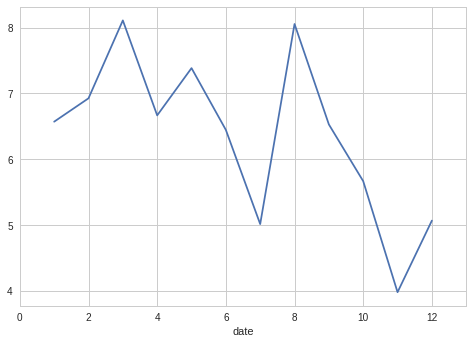

In [8]:
A = data.groupby([frauds["date"].dt.month])["date"].count()
B = data.groupby([not_frauds["date"].dt.month])["date"].count()
(A/B*100).fillna(0).plot()
plt.xlim(0,13)
plt.show()

## Weekday of Accident vs. Percentage

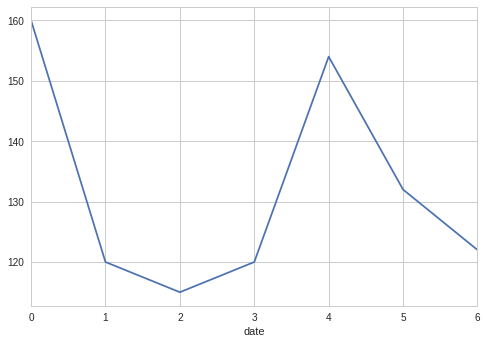

In [9]:
A = data.groupby([frauds["date"].dt.weekday])["date"].count()
B = data.groupby([not_frauds["date"].dt.weekday])["date"].count()
#(A/B*100).fillna(0).plot()
A.plot()
plt.xlim(0,6)
plt.show()

## Age of Vehicle vs. Percentage (Fraudulent / Non Fraudulent)

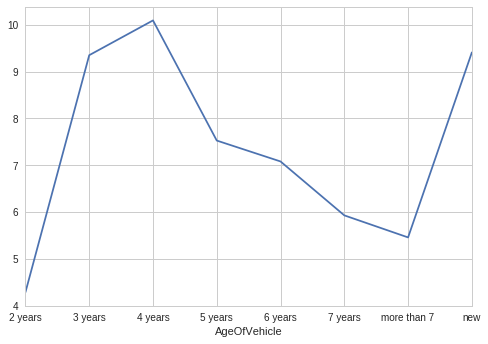

In [10]:
A = data.groupby([frauds.AgeOfVehicle])["AgeOfVehicle"].count()
B = data.groupby([not_frauds.AgeOfVehicle])["AgeOfVehicle"].count()
(A/B*100).plot()
plt.show()

## Policyholder age vs Percentage (Fraudulent / Non Fraudulent)

In the nextplot we can see that the age of the policy holder may be an useful indicator for fraud

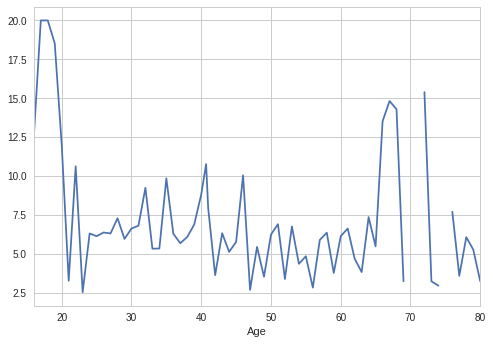

In [11]:
A = data.groupby([frauds.Age])["Age"].count()
B = data.groupby([not_frauds.Age])["Age"].count()
(A/B*100).plot()
plt.show()

## Vehicle Types

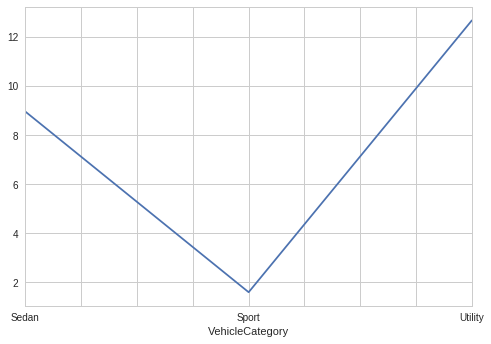

In [12]:
A = data.groupby([frauds.VehicleCategory])["VehicleCategory"].count()
B = data.groupby([not_frauds.VehicleCategory])["VehicleCategory"].count()
(A/B*100).plot()
plt.show()

## Vehicle Value

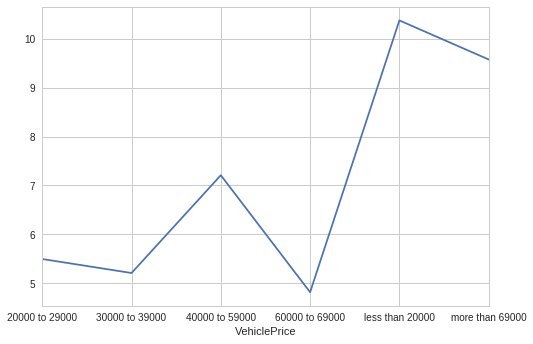

In [13]:
A = data.groupby([frauds.VehiclePrice])["VehiclePrice"].count()
B = data.groupby([not_frauds.VehiclePrice])["VehiclePrice"].count()
(A/B*100).plot()
plt.show()

## Past number of Claims

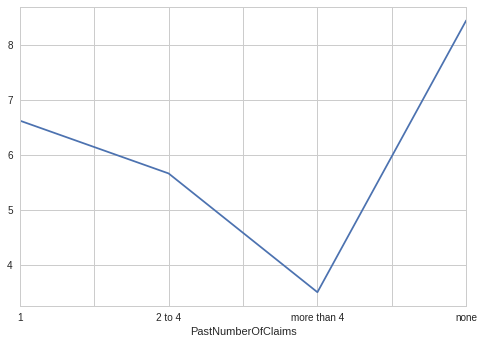

In [14]:
A = data.groupby([frauds.PastNumberOfClaims])["PastNumberOfClaims"].count()
B = data.groupby([not_frauds.PastNumberOfClaims])["PastNumberOfClaims"].count()
(A/B*100).plot()
plt.show()

## Driver Rating

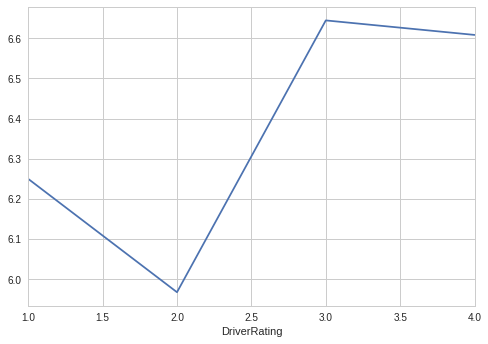

In [15]:
A = data.groupby([frauds.DriverRating])["DriverRating"].count()
B = data.groupby([not_frauds.DriverRating])["DriverRating"].count()
(A/B*100).plot()
plt.show()

## Delay between accident and reported claim

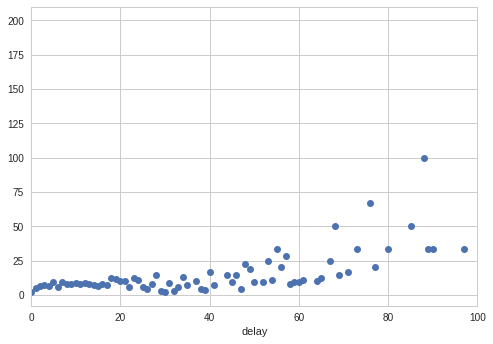

In [16]:
A = data.groupby([frauds.delay])["delay"].count()
B = data.groupby([not_frauds.delay])["delay"].count()
(A/B*100).plot(style = 'o')
plt.xlim(0,100)
plt.show()